In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# machine learning
# from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split #for spliting data
from sklearn.metrics import accuracy_score
plt.rcParams["axes.labelsize"] =18
import warnings                      #ignoring errors
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv("C:\\Users\OMARY RAMADHAN\\Desktop\\financial-inclusion-in-africa\\Train.csv")

test = pd.read_csv("C:\\Users\\OMARY RAMADHAN\\Desktop\\financial-inclusion-in-africa\\Test.csv")
ss = pd.read_csv("C:\\Users\\OMARY RAMADHAN\\Desktop\\financial-inclusion-in-africa\\SampleSubmission.csv")
variables=pd.read_csv("C:\\Users\\OMARY RAMADHAN\Desktop\\financial-inclusion-in-africa\\VariableDefinitions.csv")

In [4]:
# let's obsrve the shape of our data 
print("train data shape :", train.shape)
print("test data shape :", test.shape)
      

train data shape : (23524, 13)
test data shape : (10086, 12)


In [5]:
# show list of culumns in train data 
list(train.columns)

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [6]:
#insect train data
train.head(10)

country  year     uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018   uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018   uniqueid_2           No         Rural               No   
2   Kenya  2018   uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018   uniqueid_4           No         Rural              Yes   
4   Kenya  2018   uniqueid_5           No         Urban               No   
5   Kenya  2018   uniqueid_6           No         Rural               No   
6   Kenya  2018   uniqueid_7           No         Rural              Yes   
7   Kenya  2018   uniqueid_8           No         Rural              Yes   
8   Kenya  2018   uniqueid_9          Yes         Rural              Yes   
9   Kenya  2018  uniqueid_10           No         Urban              Yes   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   
5               7                 26               Female   
6               7                 32               Female   
7               1                 42               Female   
8               3                 54                 Male   
9               3                 76               Female   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relative     Single/Never Married   
3      Head of Household  Married/Living together   
4                  Child     Single/Never Married   
5                 Spouse  Married/Living together   
6                 Spouse  Married/Living together   
7      Head of Household  Married/Living together   
8      Head of Household  Married/Living together   
9      Head of Household       Divorced/Seperated   

                   education_level                      job_type  
0              Secondary education                 Self employed  
1              No formal education          Government Dependent  
2  Vocational/Specialised training                 Self employed  
3                Primary education     Formally employed Private  
4                Primary education           Informally employed  
5                Primary education           Informally employed  
6                Primary education                 Self employed  
7               Tertiary education  Formally employed Government  
8              Secondary education           Farming and Fishing  
9              No formal education          Remittance Dependent

In [7]:
# check for missing values
print("missing values:", train.isnull())

missing values:        country   year  uniqueid  bank_account  location_type  \
0        False  False     False         False          False   
1        False  False     False         False          False   
2        False  False     False         False          False   
3        False  False     False         False          False   
4        False  False     False         False          False   
...        ...    ...       ...           ...            ...   
23519    False  False     False         False          False   
23520    False  False     False         False          False   
23521    False  False     False         False          False   
23522    False  False     False         False          False   
23523    False  False     False         False          False   

       cellphone_access  household_size  age_of_respondent  \
0                 False           False              False   
1                 False           False              False   
2                 False      

In [8]:
# give sum of null values in each columns
print("missing values:", train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [9]:
# give general over view of miss value
print("missing values:", train.isnull().sum().sum())


missing values: 0


In [10]:
# explore target value
sns.catplot( x ="bank_account", kind = "count", data=train, palette="Set1")

In [11]:
#  view the submission file 
ss.head()

unique_id  bank_account
0  uniqueid_1 x Kenya             0
1  uniqueid_2 x Kenya             0
2  uniqueid_3 x Kenya             0
3  uniqueid_4 x Kenya             0
4  uniqueid_5 x Kenya             0

In [12]:
# print some information about the data set 
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [13]:
# lets look variables
variables.T


0                         1   \
Variable Definitions                     country                      year   
Unnamed: 1            Country interviewee is in.  Year survey was done in.   

                                                          2   \
Variable Definitions                                uniqueid   
Unnamed: 1            Unique identifier for each interviewee   

                                                  3   \
Variable Definitions                   location_type   
Unnamed: 1            Type of location: Rural, Urban   

                                                                     4   \
Variable Definitions                                   cellphone_access   
Unnamed: 1            If interviewee has access to a cellphone: Yes, No   

                                                        5   \
Variable Definitions                        household_size   
Unnamed: 1            Number of people living in one house   

                                              6   \
Variable Definitions           age_of_respondent   
Unnamed: 1            The age of the interviewee   

                                                       7   \
Variable Definitions                 gender_of_respondent   
Unnamed: 1            Gender of interviewee: Male, Female   

                                                                     8   \
Variable Definitions                             relationship_with_head   
Unnamed: 1            The interviewee’s relationship with the head o...   

                                                                     9   \
Variable Definitions                                     marital_status   
Unnamed: 1            The martial status of the interviewee: Married...   

                                                                     10  \
Variable Definitions                                    education_level   
Unnamed: 1            Highest level of education: No formal educatio...   

                                                                     11  
Variable Definitions                                           job_type  
Unnamed: 1            Type of job interviewee has: Farming and Fishi...

In [14]:

train["bank_account"].value_counts()
sns.catplot( x ="bank_account", kind = "count", data=train, palette="Set1")

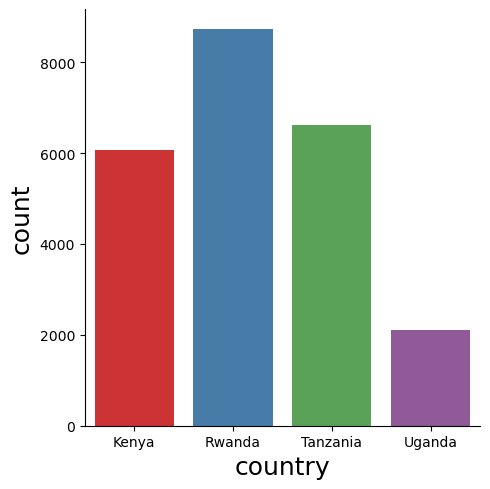

In [15]:
train["country"].value_counts
sns.catplot( x ="country", kind = "count", data=train, palette="Set1")

In [16]:
train["location_type"].value_counts
sns.catplot( x ="location_type", kind = "count", data=train, palette="Set1")

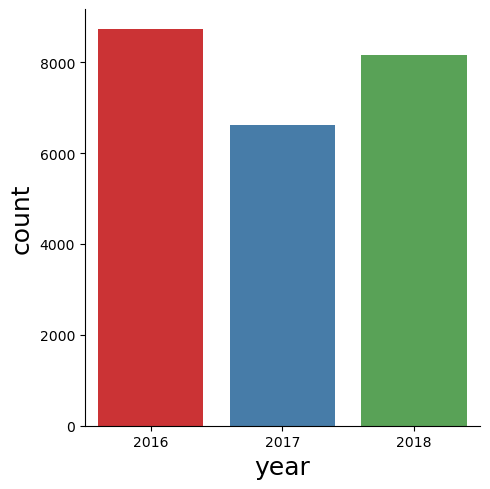

In [17]:
train["year"].value_counts
sns.catplot( x ="year", kind = "count", data=train, palette="Set1")

In [18]:
train["cellphone_access"].value_counts
sns.catplot( x ="cellphone_access", kind = "count", data=train, palette="Set1")

In [19]:
train["gender_of_respondent"].value_counts
sns.catplot( x ="gender_of_respondent", kind = "count", data=train, palette="Set1")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

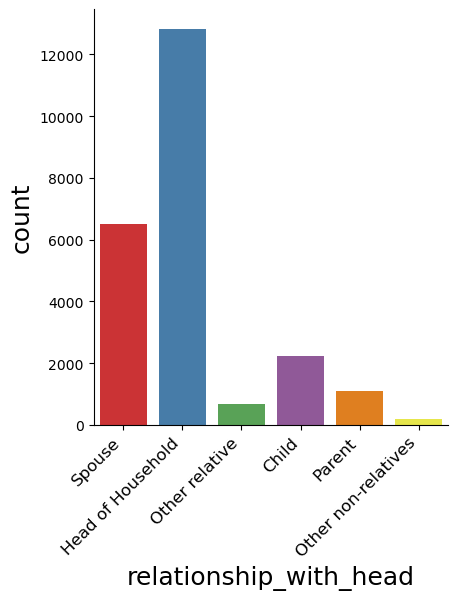

In [20]:
sns.catplot( x ="relationship_with_head", kind = "count", data=train, palette="Set1")
plt.xticks(
    rotation = 45,
    horizontalalignment = "right",
    fontweight = "light",
    fontsize = "large"
)

In [21]:
sns.catplot( x ="marital_status", kind = "count", data=train, palette="Set1")
plt.xticks(
    rotation = 45,
    horizontalalignment = "right",
    fontweight = "light",
    fontsize = "large"
)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

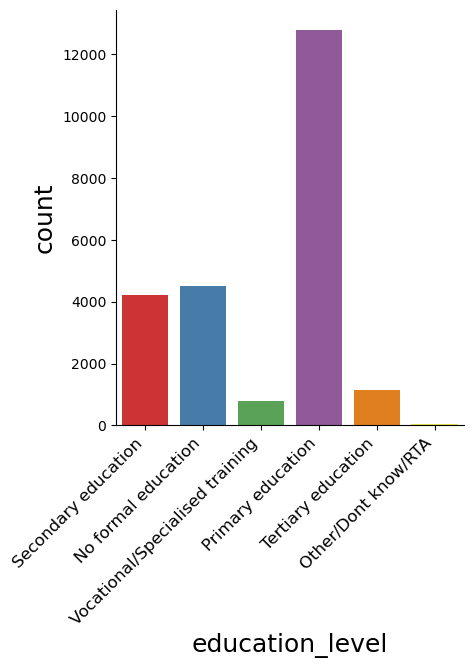

In [22]:
sns.catplot( x ="education_level", kind = "count", data=train, palette="Set1")
plt.xticks(
    rotation = 45,
    horizontalalignment = "right",
    fontweight = "light",
    fontsize = "large"
)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

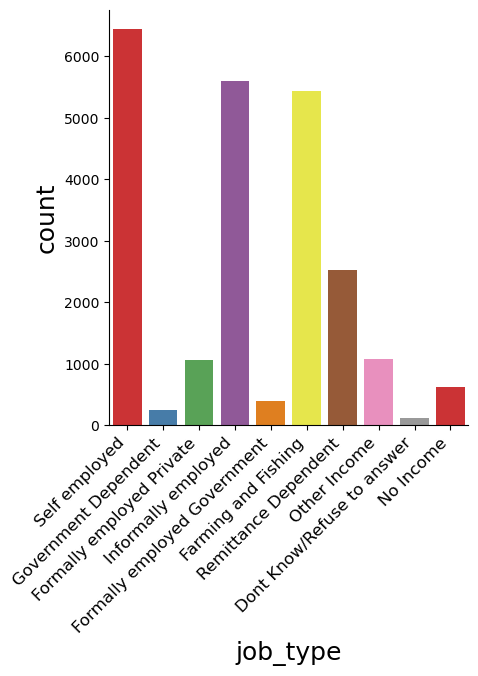

In [23]:
sns.catplot( x ="job_type", kind = "count", data=train, palette="Set1")
plt.xticks(
    rotation = 45,
    horizontalalignment = "right",
    fontweight = "light",
    fontsize = "large"
)

Text(0.5, 0, 'household')

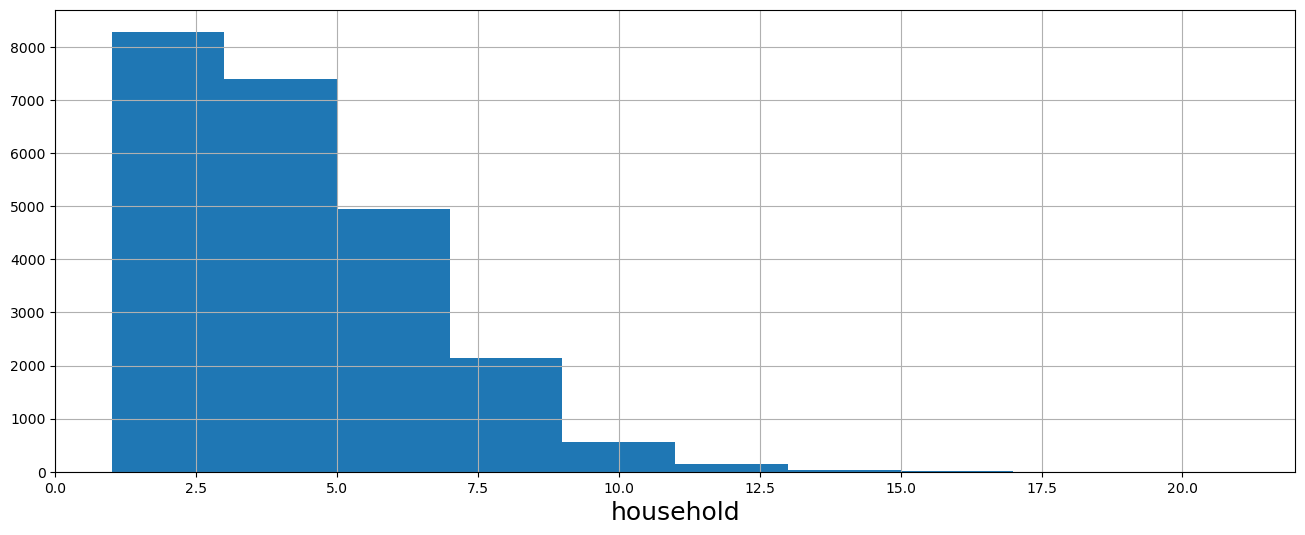

In [24]:

plt.figure(figsize = (16,6))
train.household_size.hist()
plt.xlabel("household")


In [25]:
plt.figure(figsize =(16,6))
sns.catplot( x ="location_type", hue="bank_account", kind = "count", data=train, palette="Set1")
plt.xticks(
    fontweight = "light",
    fontsize = "x-large"
)

([0, 1], [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

<Figure size 1600x600 with 0 Axes>

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

<Figure size 1600x600 with 0 Axes>

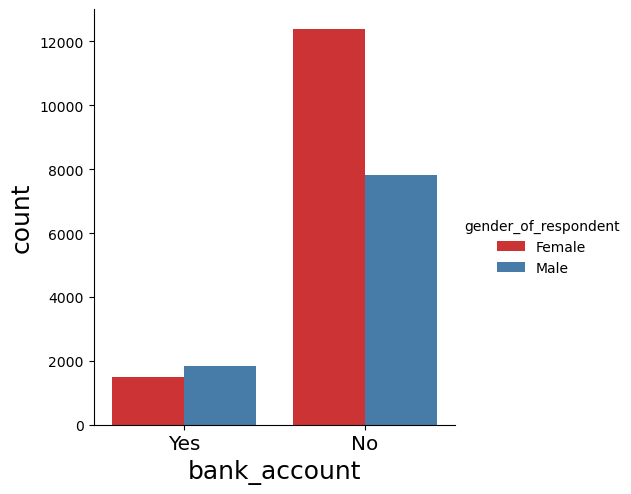

In [26]:
plt.figure(figsize =(16,6))
sns.catplot( x ="bank_account", hue="gender_of_respondent", kind = "count", data=train, palette="Set1")
plt.xticks(
    fontweight = "light",
    fontsize = "x-large"
)

In [27]:
plt.figure(figsize =(16,6))
sns.catplot( x ="bank_account", hue="cellphone_access", kind = "count", data=train, palette="Set1")
plt.xticks(
    fontweight = "light",
    fontsize = "x-large"
)

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

<Figure size 1600x600 with 0 Axes>

In [28]:
# import processing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#  covnert target label into numerical
le = LabelEncoder()
train["bank_account"] = le.fit_transform(train["bank_account"])



In [29]:
# separate training features from target
X_train= train.drop(["bank_account"], axis=1) #drop all bank_account values
y_train= train["bank_account"]
print(y_train)



0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [30]:
# function to process our data from train model
def preprocessing_data(data):
    # convert the followng numerical labels from intergers to float
    float_array = data[["household_size","age_of_respondent","year"]].values.astype(float)
    
    # cartegorical features to convert to be one hot encoder
    categ = ["relationship_with_head","marital_status","education_level","job_type","country"]
    
    # one hot encoder convertion
    data = pd.get_dummies(data,prefix_sep ="_",columns=categ)
    
    # local encoder convert(convert cartegorical data into numerical)
    data["location_type"]=le.fit_transform(data["location_type"])
    data["cellphone_access"]=le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"]=le.fit_transform(data["gender_of_respondent"])
    
    # drop unique column
    data = data.drop(["uniqueid"],axis=1)
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range= (0,1))
    data = scaler.fit_transform(data) #fit is for training
    return data
    


In [31]:
# preprocess the train data 
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

In [32]:
# the first train row
print(processed_train[:2])

[[1.         0.         1.         0.1        0.0952381  0.
  0.         0.         0.         0.         0.         1.
  0.         0.         1.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         1.         0.         0.
  0.        ]
 [1.         0.         0.         0.2        0.64285714 0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.        ]]


In [33]:
# shape of the processed train set
print(processed_train.shape)

(23524, 37)


In [34]:
import sklearn.model_selection

In [39]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train, test_size = 30, random_state=42)

In [36]:
 # import classifier algorithim here
 from xgboost import XGBClassifier


 # create model
 xg_model = XGBClassifier()
 #fitting the models
 xg_model.fit(X_Train,y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)
accuracy_score = accuracy_score(y_val,xg_y_model)
print("accuracy is = ", accuracy_score*100)

# Get error rate
print("Error rate of XGB classifier: ",  1 - accuracy_score)

accuracy is =  90.0
Error rate of XGB classifier:  0.09999999999999998


In [38]:
# print classfication re[poort
from sklearn.metrics import classification_report

report = classification_report(y_val,xg_y_model)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.50      0.33      0.40         3

    accuracy                           0.88        24
   macro avg       0.70      0.64      0.67        24
weighted avg       0.86      0.88      0.86        24



In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
xgboost_model_predicted = xg_model.predict(X_Val)
scores = accuracy_score(y_val,xgboost_model_predicted)
print("error rate for XGBClassifier model is: ", 1 - scores)

cm = confusion_matrix(y_val,xgboost_model_predicted, normalize ="true")
print("Confusion Matrix")


error rate for XGBClassifier model is:  0.09999999999999998
Confusion Matrix


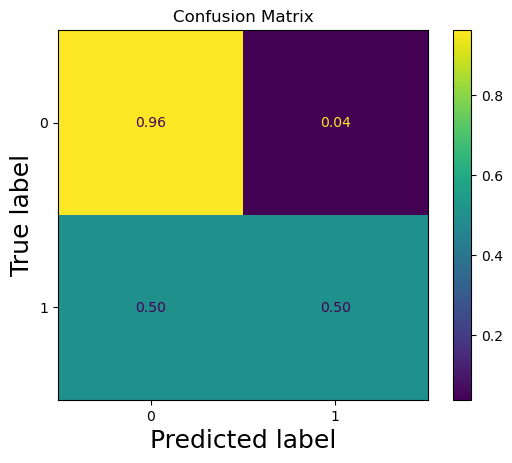

In [51]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels= np.unique(y_val))
disp.plot(cmap = "viridis",values_format = ".2f")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
test.bank_account = xg_model.predict(processed_test)

submission